In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rds_connection_string = "postgres:booth@35.223.88.224:5432/Spotify"
engine = create_engine(f'postgresql://{rds_connection_string}') 

In [3]:
#Top 200 table query
pd.read_sql_query("""select tt.title,a.artist, c.country,tt.streams,tt.rank,tt.date 
from 
    "Top_200" tt
Join 
    "country" c on
        tt.country_id = c.country_id
join artist a on
    tt.artist_id = a.artist_id;
""", con=engine) 

,title,artist,country,streams,rank,date
0,STAY (with Justin Bieber),The Kid LAROI,global,68764542,1,2021-09-03
1,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,global,43663527,2,2021-09-03
2,Bad Habits,Ed Sheeran,global,34182580,3,2021-09-03
3,Beggin',Måneskin,global,32620597,4,2021-09-03
4,Hurricane,Kanye West,global,30609671,5,2021-09-03
...,...,...,...,...,...,...
10995,Küçücüğüm,Yalın,tr,203594,196,2021-08-06
10996,Siyah,"Patron, Sagopa Kajmer",tr,201982,197,2021-08-06
10997,Seni Buldum Ya,Kaan Boşnak,tr,201945,198,2021-08-06
10998,STAY (with Justin Bieber),The Kid LAROI,tr,201409,199,2021-08-06


In [4]:
#Viral 50 table query
pd.read_sql_query("""
select vf.title,a.artist, c.country,vf.rank,vf.date 
from 
    "Viral_50" vf
Join 
    "country" c on
        vf.country_id = c.country_id
join artist a on
    vf.artist_id = a.artist_id;
""", con=engine) 

,title,artist,country,rank,date
0,It's Only Me - Studio Version,Kaleb J,global,1,2021-09-02
1,Chega E Senta - Ao Vivo,John Amplificado,global,2,2021-09-02
2,Manike Mage Hithe,"Chamath Sangeeth, Yohani, Satheeshan",global,3,2021-09-02
3,Now I Know,Kaleb J,global,4,2021-09-02
4,Passinho Debochado,Dan Ventura,global,5,2021-09-02
...,...,...,...,...,...
2745,Ölebilirim,"Bedo, Patron",tr,46,2021-08-05
2746,Bingo,Organize,tr,47,2021-08-05
2747,Anıları Sakla,Batuhan Kordel,tr,48,2021-08-05
2748,Flashbacks (Slowed),CRASPORE,tr,49,2021-08-05


In [5]:
#Most songs on the top 200 query
pd.read_sql_query("""
select
    a.artist,
    count(tt.artist_id) 
from
    "Top_200" tt
join
    "artist" a on
    tt.artist_id = a.artist_id
group by 
    a.artist
order by
    count(tt.artist_id) desc
limit 100;
    

""",con=engine)

,artist,count
0,Olivia Rodrigo,291
1,BTS,286
2,Doja Cat,205
3,The Weeknd,162
4,Billie Eilish,150
...,...,...
95,Henrique & Juliano,18
96,Os Barões Da Pisadinha,18
97,Cairokee,18
98,Jamie Miller,18


In [6]:
#Kanye West's Top Songs
pd.read_sql_query("""
select 
    tt.rank,
    tt.title,
    tt.streams,
    a.artist,
    tt.date,
    c.country
from
    "Top_200" tt

join
    "artist" a on
    tt.artist_id = a.artist_id
join 
    "country" c on
        tt.country_id = c.country_id
where
    a.artist = 'Kanye West' and c.country = 'global'
order by
    tt.streams desc;
    

""",con=engine)

,rank,title,streams,artist,date,country
0,5,Hurricane,30609671,Kanye West,2021-09-03,global
1,10,Jail,24792859,Kanye West,2021-09-03,global
2,12,Off The Grid,24302344,Kanye West,2021-09-03,global
3,16,Praise God,19702684,Kanye West,2021-09-03,global
4,19,Moon,18904930,Kanye West,2021-09-03,global
5,26,Believe What I Say,16052001,Kanye West,2021-09-03,global
6,28,Jonah,15535805,Kanye West,2021-09-03,global
7,29,God Breathed,15309684,Kanye West,2021-09-03,global
8,30,Ok Ok,14811311,Kanye West,2021-09-03,global
9,34,Heaven and Hell,13876358,Kanye West,2021-09-03,global


In [7]:
#Top 10 Streams Globally
pd.read_sql_query("""
select distinct
    
    a.artist,
    sum(tt.streams) as "total streams globally"
from
    "artist" a
join
    "Top_200" tt on
    tt.artist_id = a.artist_id
join
    "country" c on
    tt.country_id = c.country_id
where
    c.country = 'global'
group by
    a.artist
order by
    sum(tt.streams) desc


limit 10;    

""",con=engine)

,artist,total streams globally
0,Olivia Rodrigo,613848271
1,Doja Cat,486483965
2,Billie Eilish,420394002
3,The Kid LAROI,387723854
4,Kanye West,365255505
5,Lil Nas X,335014898
6,Måneskin,318737165
7,The Weeknd,291351290
8,Ed Sheeran,267400555
9,BTS,215541918


In [8]:
#Streaming Number by Country
countryStreamsDf = pd.read_sql_query("""
select
    c.country,
    sum(tt.streams) as "Total_Streams"
from
    "Top_200" tt
join
    "country" c on
    tt.country_id = c.country_id
where
    c.country != 'global'
group by
    c.country 
order by    
    sum(tt.streams) desc

""",con=engine)
countryStreamsDf

,country,Total_Streams
0,us,2589092231
1,br,1613792818
2,mx,1206862165
3,in,545285074
4,tr,494903854
5,jp,419505261
6,ph,414835359
7,th,92750763
8,vn,55937119
9,eg,25201554


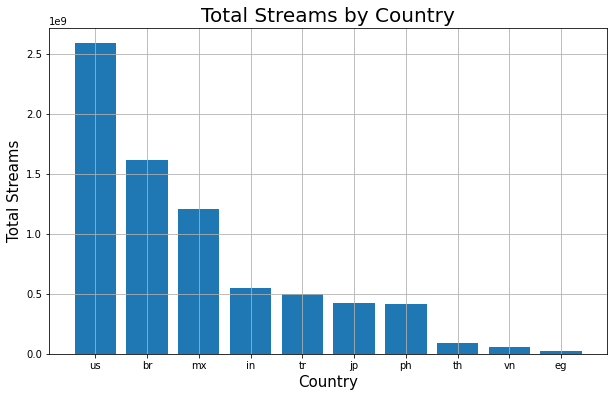

In [9]:
plt.figure(figsize=(10,6))
plt.bar(countryStreamsDf.country,countryStreamsDf.Total_Streams)
plt.grid()
plt.title("Total Streams by Country",fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Total Streams",fontsize=15)


plt.show()

In [10]:
#STAY (with Justin Bieber) by The Kid LAROI
stayDf = pd.read_sql_query("""
select
    c.country,
    tt.streams,
    tt.date
from
    "Top_200" tt
join
    "country" c on
    tt.country_id = c.country_id
where
    c.country = 'global' AND tt.title = 'STAY (with Justin Bieber)'
order by
    tt.date


""",con=engine)
stayDf

,country,streams,date
0,global,53295313,2021-08-06
1,global,61564095,2021-08-13
2,global,69314436,2021-08-20
3,global,70502410,2021-08-27
4,global,68764542,2021-09-03


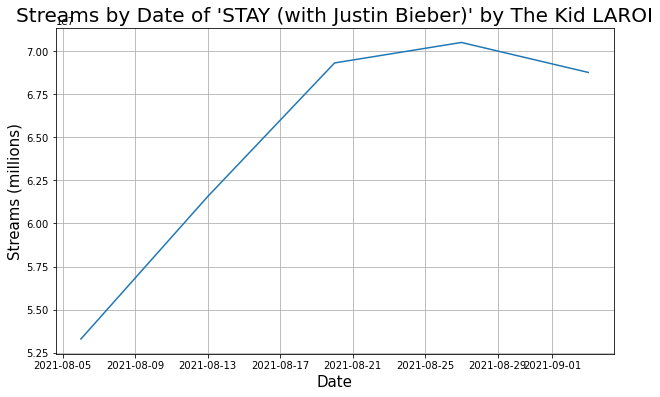

In [11]:
plt.figure(figsize=(10,6))
plt.plot(stayDf.date,stayDf.streams)
plt.grid()
plt.title("Streams by Date of 'STAY (with Justin Bieber)' by The Kid LAROI",fontsize=20)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Streams (millions)",fontsize=15)


plt.show()